In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\pc\AppData\Local\Temp\ipykernel_6916\1188535067.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_insurance[col], labels=[col])


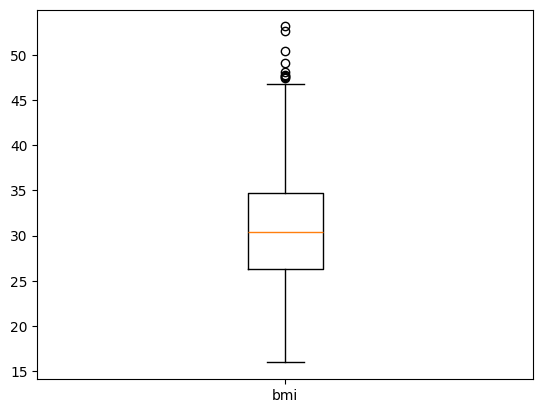

C:\Users\pc\AppData\Local\Temp\ipykernel_6916\1188535067.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_insurance[col], labels=[col])


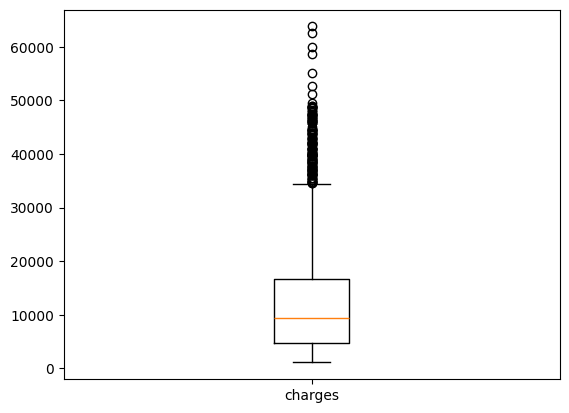

In [5]:
list = ['bmi', 'charges']
for col in df_insurance[list]:
    plt.boxplot(df_insurance[col], labels=[col])
    plt.show()


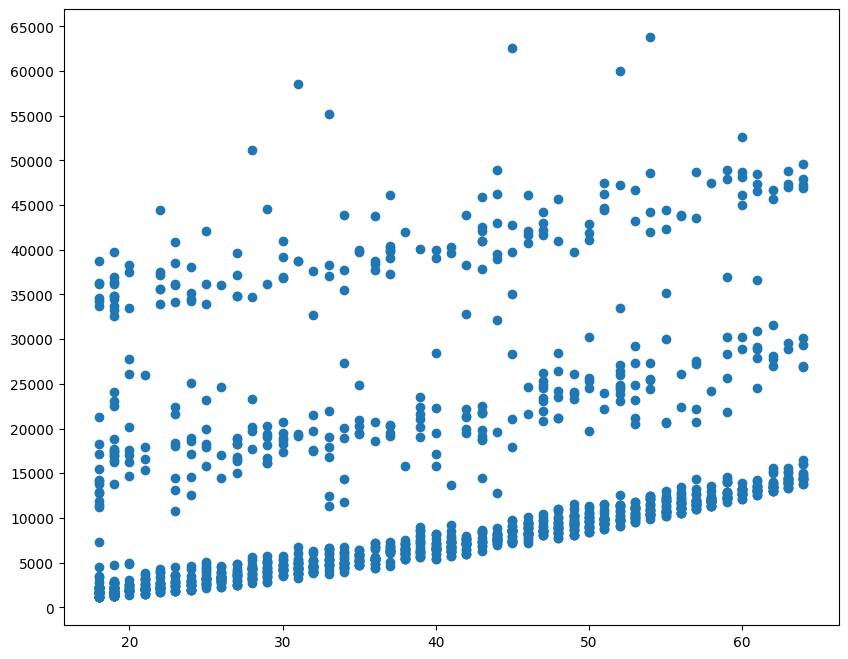

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(df_insurance['age'], df_insurance['charges'])
plt.yticks(np.arange(0,70000,5000))
plt.show()

Correlation Coefficient

In [7]:
numeric_columns = df_insurance.select_dtypes(include='number')
numeric_columns.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Encode cột Sex (Map)

In [8]:
sex_code = {'female': 0, 'male': 1}
df_insurance['sex'] = df_insurance['sex'].map(sex_code)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


Encode cột Smoker (Map)

In [9]:
smoker_code = {'no': 0, 'yes': 1}
df_insurance['smoker'] = df_insurance['smoker'].map(smoker_code)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Encode cột Region (One-hot Encoding)

In [10]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df_insurance[['region']])
enc.categories_

one_hot = enc.transform(df_insurance[['region']]).toarray()
one_hot

df_insurance[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

df_insurance

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


RMSE calculate function

In [11]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Train the model and predict the Charges

In [12]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df_insurance[input_cols], df_insurance['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
# print('Target (1st record): ', targets[0])
# print('Prediction (1st record): ', predictions[0])
print('RMSE:', loss)

df_insurance['Prediction'] = predictions
df_insurance

RMSE: 6041.6796511744515


,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,Prediction
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0,25293.713028
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0,3448.602834
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0,6706.988491
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0,3754.830163
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0,5592.493386
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0,12351.323686
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0,3511.930809
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0,4149.132486
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0,1246.584939
